In [3]:
import numpy as np
import pandas as pd
from functions import generate_data, get_weighted_sum, sigmoid, cross_entropy, update_weights, update_bias   # script for storing the functions

In [ ]:

bias = 0.5 # standard bias
l_rate = 0.001 # try and change these to see the difference
epochs = 700 # try and change these to see the difference
epoch_loss = []

data, weights = generate_data(500,3) # here you can change amount of rows and columns

def train_model(data, weights, bias, l_rate, epochs):
    for e in range(epochs):
        individual_loss = []
        for i in range(len(data)):
            feature = data.loc[i][:-1] # get 1 row at a time. [:-1] means every column EXCEPT the last
            target = data.iloc[i,-1]
            w_sum = get_weighted_sum(feature, weights, bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target, prediction)
            individual_loss.append(loss)
            #gradient descent
            weights = update_weights(weights, l_rate, target, prediction, feature)
            bias = update_bias(bias, l_rate, target, prediction)
        average_loss = sum(individual_loss)/len(individual_loss)
        epoch_loss.append(average_loss)
        
        #print only first and last 3
        if e < 3 or e >= epochs - 3:
            print("**********************")
            print("epoch: ", e)
            print(average_loss)
        
train_model(data, weights, bias, l_rate, epochs)


**********************
epoch:  0
0.4025526582758607
**********************
epoch:  1
0.372038358234151
**********************
epoch:  2
0.34999730847808513
**********************
epoch:  697
0.29872986981437216
**********************
epoch:  698
0.2987298616449908
**********************
epoch:  699
0.29872985357281534


<Axes: >

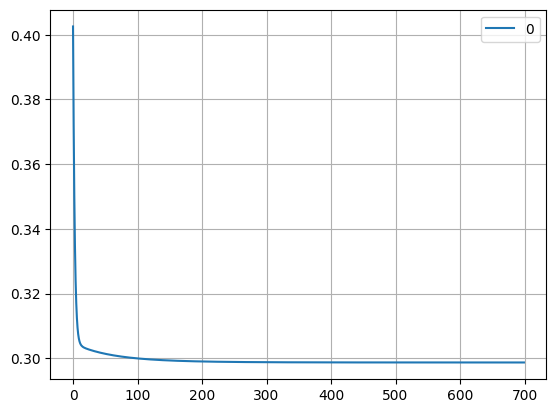

In [14]:
# plot the average loss
df = pd.DataFrame(epoch_loss)
df.plot(kind="line", grid=True)